In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from matplotlib import cm
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

In [2]:
all_data_files = glob('./data/*')

In [3]:
def clean_data(data):
    data[data == -1] = 0
    data[143:167, 223:247][data[143:167, 223:247] == 0] = 1
    return data 

def resize_data(data):
    im = Image.fromarray(np.uint8(cm.gist_earth(data, alpha=None)*255)[:, :, :3])
    resized_data = np.array(im.resize((112, 76)).convert('L'))
    return resized_data/resized_data.max()


class SeaIceDataset(Dataset):
    
    def __init__(self, seq_len, data_folder='./data/*'):
        self.seq_len = seq_len
        self.data_files = glob(data_folder)
        
    def __len__(self):
        return len(self.data_files) - (self.seq_len + 1)
    
    def __getitem__(self, ix):
        X = np.array([resize_data(clean_data(np.load(d))).flatten() for d in self.data_files[ix:ix+self.seq_len]])
        y = resize_data(clean_data(np.load(self.data_files[ix+self.seq_len+1]))).flatten()
        return X, y
    
final = resize_data(clean_data(np.load(all_data_files[-1]))).flatten()    
dataset = SeaIceDataset(3)
assert(np.allclose(final, dataset[len(dataset)-1][1]))

# Visualize some resized examples

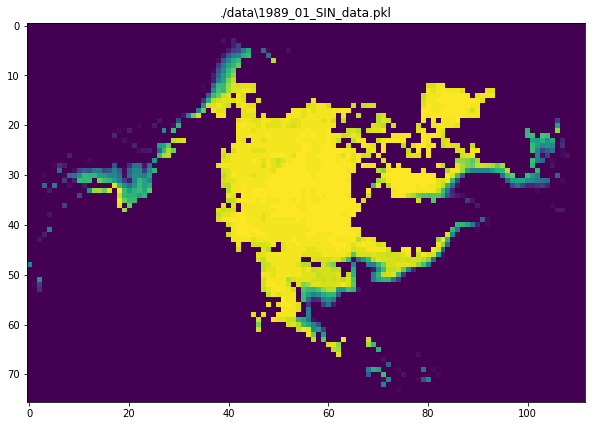

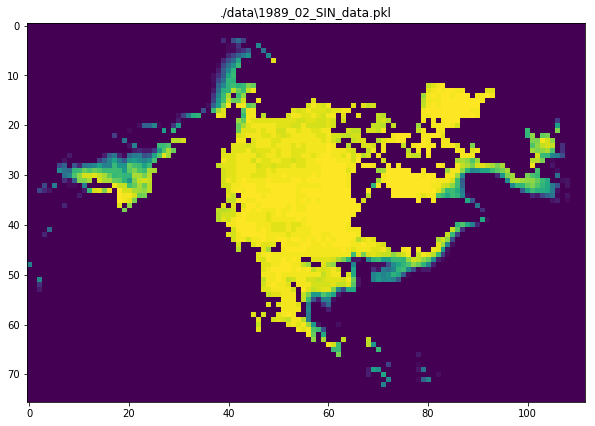

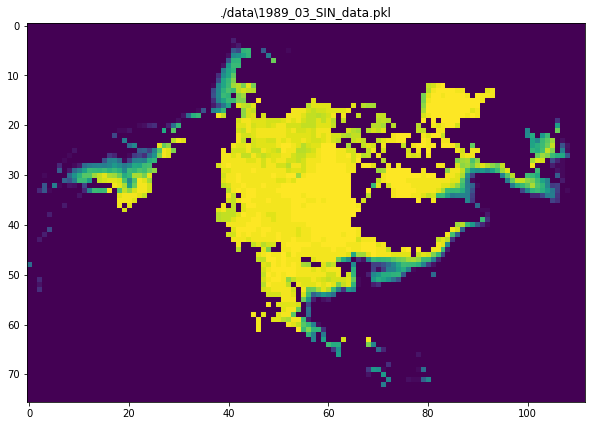

In [6]:
seqs = []
for d in all_data_files[:3]:
    data = clean_data(np.load(d))
    plt.figure(figsize=(10,10))
    plt.title(d)
    plt.imshow(resize_data(data))
    seqs.append(resize_data(data).flatten())

# Examining input data in context of LSTM

In [7]:
def make_seqs(xs, seq_length, batch_size, input_size):
    return torch.cat((tuple(map(lambda x: torch.tensor(x, dtype=torch.float32), xs)))).view(batch_size,seq_length, input_size)

In [8]:
batch_size = 1
seq_length = 3
input_size = 8512
hidden_size = 8512
n_epochs = 10

In [9]:
si_dataset = SeaIceDataset(seq_length)

In [10]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)

In [17]:
h = (torch.randn(1, 1, hidden_size),
     torch.randn(1, 1, hidden_size))

In [12]:
optimizer = torch.optim.Adam(mod.parameters())

In [13]:
criterion = torch.nn.MSELoss()

In [14]:
dl = DataLoader(si_dataset, shuffle=True, batch_size=batch_size)

In [123]:
for X, y in dl:
    print(X.shape)
    print(y.shape)
    break

torch.Size([1, 3, 8512])
torch.Size([1, 8512])


In [124]:
25536/8512

3.0

In [ ]:
for epoch in range(n_epochs):
    print("epoch: {}".format(epoch))
    losses = []
    for X, y in dl:
#         X = X.cuda()
#         y = y.cuda()
        optimizer.zero_grad()

        xs = make_seqs(X, seq_length, batch_size, input_size)
        o,h = mod(xs.reshape(batch_size, seq_length, input_size), h)
        y = torch.tensor(y, dtype=torch.float)
        
        loss = criterion(o, y)
        loss.backward(retain_graph=True)
        losses.append(loss.item())
        optimizer.step()
    
    print("loss: {}".format(np.mean(losses)))

epoch: 0


c:\users\stone\desktop\spring2019\computationaltopology\project\proj_64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
c:\users\stone\desktop\spring2019\computationaltopology\project\proj_64\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


# Plotting value of the model

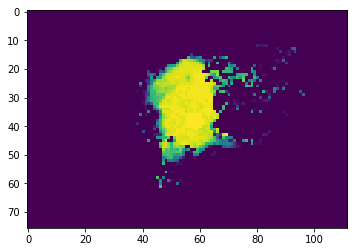

In [22]:
plt.imshow(x[0].data.numpy().reshape(76,112))

In [32]:
X, y = si_dataset[3]

In [33]:
X = make_seqs(X, seq_length, 1, input_size)

In [34]:
o,h = mod(X)

In [35]:
o

tensor([[[-0.0174, -0.0018, -0.0012,  ...,  0.0028, -0.1777,  0.0568]],

        [[-0.0146, -0.0021, -0.0007,  ...,  0.0037, -0.1116,  0.0378]],

        [[-0.0157, -0.0034, -0.0008,  ...,  0.0052, -0.0837,  0.0307]]],
       grad_fn=<StackBackward>)

In [36]:
h

(tensor([[[-0.0157, -0.0034, -0.0008,  ...,  0.0052, -0.0837,  0.0307]]],
        grad_fn=<StackBackward>),
 tensor([[[-0.3270, -0.0455, -0.0222,  ...,  0.0805, -0.2857,  0.1528]]],
        grad_fn=<StackBackward>))

In [37]:
o.shape

torch.Size([3, 1, 8512])

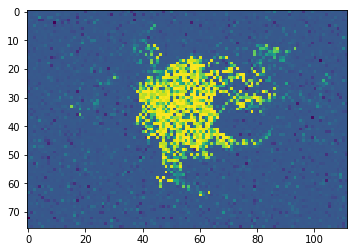

In [42]:
plt.imshow(o[2].data.numpy().reshape(76, 112))

In [249]:
inputs.shape

torch.Size([5, 1, 3])

In [250]:
batch_size = 1
seq_length = 3
input_size = 100
hidden_size = 3

In [251]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [252]:
data1.shape

(100,)

In [253]:
data1 = data.flatten()[:100]
data2 = data.flatten()[100:200]
data3 = data.flatten()[200:300]

Seq Len x Batch x Size


In [257]:
torch.cat((tuple(map(lambda x: torch.randn(1, input_size), [data1, data2, data3])))).shape

torch.Size([3, 100])

In [268]:
x = torch.cat((tuple(map(lambda x:  torch.randn(1, input_size), [data1, data2, data3])))).view(seq_length, batch_size, input_size)
x.shape, x.dtype

(torch.Size([3, 1, 100]), torch.float32)

In [281]:
x = torch.cat((tuple(map(lambda x: torch.tensor(x, dtype=torch.float32), [data1, data2, data3])))).view(seq_length, batch_size, input_size)
x.shape, x.dtype

(torch.Size([3, 1, 100]), torch.float32)

In [11]:
hiddens = (torch.randn(1,1, hidden_size), torch.randn(1,1,hidden_size))

In [279]:
o, h = mod(x, hiddens)
o, h

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #4 'mat1'

In [148]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [147]:
lstm = torch.nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
# for i in inputs:
#     # Step through the sequence one element at a time.
#     # after each step, hidden contains the hidden state.
#     out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(inputs.shape)
print(out)
print(hidden)

torch.Size([5, 1, 3])
tensor([[[ 0.0859, -0.1804,  0.1008]],

        [[-0.0381, -0.3172, -0.0133]],

        [[-0.0539, -0.3373,  0.0405]],

        [[-0.1510, -0.2020, -0.0245]],

        [[ 0.0404, -0.3629, -0.1642]]], grad_fn=<StackBackward>)
(tensor([[[ 0.0404, -0.3629, -0.1642]]], grad_fn=<StackBackward>), tensor([[[ 0.1371, -0.5139, -0.2110]]], grad_fn=<StackBackward>))


In [143]:
inputs

tensor([[[-0.8551,  0.8662,  1.2563]],

        [[ 1.8073, -0.4190, -2.4308]],

        [[ 1.4667,  0.3441, -0.1738]],

        [[ 0.1573, -0.3300, -0.1598]],

        [[-1.5100,  0.6503,  0.4261]]])

In [144]:
inputs.shape

torch.Size([5, 1, 3])

Torin's attempt

In [6]:
class LSTM(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=1):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = torch.nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        #self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
       # y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return lstm_out[-1], self.hidden



In [15]:
def make_seqs(xs, seq_length, batch_size, input_size):
    return torch.cat((tuple(map(lambda x: torch.tensor(x, dtype=torch.float32), xs)))).view(seq_length, batch_size, input_size)
#setup params
batch_size = 2
seq_length = 3
learning_rate=.05
input_size = 8512
hidden_size = 8512
epochs=1
num_layers=1

h = (torch.randn(1,1, hidden_size), torch.randn(1,1,hidden_size))
si_dataset = SeaIceDataset(seq_length)


In [16]:
model = LSTM(input_size, hidden_size, batch_size, output_dim=input_size, num_layers=num_layers)
loss_fn = torch.nn.MSELoss(size_average=False)

optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [ ]:
dl = DataLoader(si_dataset,shuffle=True)
for X, y in dl:
    print("WOW")
    
    optimiser.zero_grad()
    
    xs = make_seqs(X, seq_length, 1, input_size)
    
    for x in xs:
        o, h = mod(x.view(1,1,-1), h)
    print(o.shape)
    y = torch.tensor(y, dtype=torch.float)
    loss = loss_fn(o, y)
    loss.backward(retain_graph=True)
    optimizer.step()

WOW


c:\users\stone\desktop\spring2019\computationaltopology\project\proj_64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


torch.Size([1, 1, 8512])


c:\users\stone\desktop\spring2019\computationaltopology\project\proj_64\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
